<a id="imports"></a>
# 1. Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import average_precision_score



<a id="check"></a>
# 2. Checking Data 💾

In [17]:
df = pd.read_csv('E:\\Study\\Project\\FTD\\Final Transactions.csv')

In [18]:
df.head(20)

,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,0,0
1,1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0,0
2,2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1,1
3,3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,0,0
4,4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,0,0
5,5,5,2023-01-01 00:10:45,568,8803,401.17,645,0,0,0
6,6,6,2023-01-01 00:11:30,2803,5490,938.54,690,0,0,0
7,7,7,2023-01-01 00:11:44,4684,2486,206.53,704,0,0,0
8,8,8,2023-01-01 00:11:53,4128,8354,253.47,713,0,0,0
9,9,9,2023-01-01 00:13:44,541,6212,555.63,824,0,0,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   TRANSACTION_ID     int64  
 2   TX_DATETIME        object 
 3   CUSTOMER_ID        int64  
 4   TERMINAL_ID        int64  
 5   TX_AMOUNT          float64
 6   TX_TIME_SECONDS    int64  
 7   TX_TIME_DAYS       int64  
 8   TX_FRAUD           int64  
 9   TX_FRAUD_SCENARIO  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 133.8+ MB


In [20]:
df.describe().round(2)

,Unnamed: 0,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
count,1754155.00,1754155.00,1754155.00,1754155.00,1754155.00,1754155.00,1754155.00,1754155.00,1754155.00
mean,877077.00,877077.00,2504.01,4996.73,539.68,7903233.71,90.97,0.13,0.14
std,506381.08,506381.08,1445.99,2886.10,1179.71,4565172.38,52.84,0.34,0.39
min,0.00,0.00,0.00,0.00,0.00,31.00,0.00,0.00,0.00
25%,438538.50,438538.50,1252.00,2502.00,179.95,3940846.50,45.00,0.00,0.00
50%,877077.00,877077.00,2506.00,4994.00,421.75,7902670.00,91.00,0.00,0.00
75%,1315615.50,1315615.50,3765.00,7495.00,750.60,11865661.50,137.00,0.00,0.00
max,1754154.00,1754154.00,4999.00,9999.00,647837.50,15811197.00,182.00,1.00,3.00


In [21]:
object_cols = ["TX_DATETIME"]

for i in object_cols:
    print("column name : {}".format(i))
    print("Number of unique columns of ", i, ":{}".format(df[i].nunique()))
    print("Values of unique columns of ", i, "is below: \n{}".format(df[i].value_counts()))
    print("------------------------------------------------------------------------")

column name : TX_DATETIME
Number of unique columns of  TX_DATETIME :1635076
Values of unique columns of  TX_DATETIME is below: 
TX_DATETIME
2023-04-03 12:10:19    6
2023-05-01 14:08:48    6
2023-05-12 09:11:39    5
2023-04-16 08:14:22    5
2023-04-26 14:07:42    5
                      ..
2023-03-05 06:37:04    1
2023-03-05 06:36:57    1
2023-03-05 06:36:55    1
2023-03-05 06:36:20    1
2023-07-02 23:59:57    1
Name: count, Length: 1635076, dtype: int64
------------------------------------------------------------------------


In [22]:
df.isna().sum()

Unnamed: 0           0
TRANSACTION_ID       0
TX_DATETIME          0
CUSTOMER_ID          0
TERMINAL_ID          0
TX_AMOUNT            0
TX_TIME_SECONDS      0
TX_TIME_DAYS         0
TX_FRAUD             0
TX_FRAUD_SCENARIO    0
dtype: int64

Luckily, there are no null values

<a id="EDA"></a>
# 3. Exploratory Data Analysis (EDA) 📊

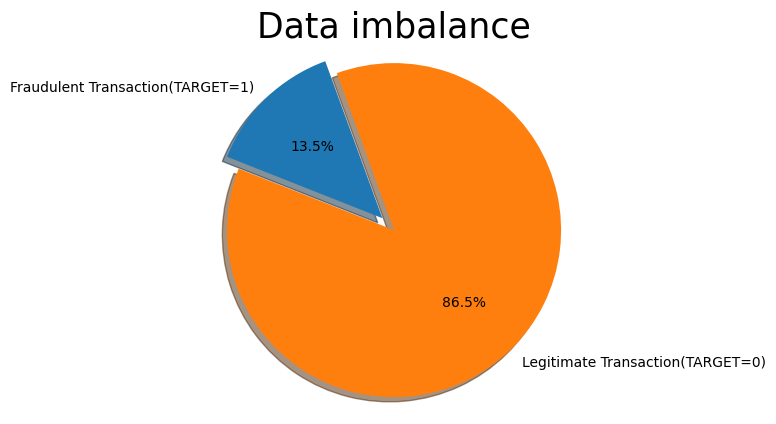

In [23]:
count1 = 0 
count0 = 0
for i in df['TX_FRAUD'].values:
    if i == 1:
        count1 += 1
    else:
        count0 += 1
        
count1 = (count1/len(df['TX_FRAUD']))*100
count0 = (count0/len(df['TX_FRAUD']))*100

x = ['Fraudulent Transaction(TARGET=1)','Legitimate Transaction(TARGET=0)']
y = [count1, count0]


explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Data imbalance',fontsize=25)
plt.show()

Given that only 13.5% of the data represents fraudulent transactions, the dataset is highly imbalanced. It will be necessary to balance it in order to ensure accurate modeling results.

In [24]:
df = pd.read_csv('E:\\Study\\Project\\FTD\\Final Transactions.csv')

df["month"] = pd.DatetimeIndex(df["TX_DATETIME"]).month

grouped = df.groupby(["month", "TX_FRAUD"]).size().reset_index(name="count")

fig = px.bar(grouped, x="month", y="count", color="TX_FRAUD", barmode="group",
             labels={"month": "Month", "count": "Number of Transactions", "TX_FRAUD": "Transaction Type"})

fig.show()

In [25]:
df = pd.read_csv('E:\\Study\\Project\\FTD\\Final Transactions.csv')
df = df[(df['TX_FRAUD_SCENARIO'] != 0) & (df['TX_AMOUNT'] != 0)]
grouped = df.groupby("TX_FRAUD_SCENARIO").size().reset_index(name="count")

fig = px.bar(grouped, x="TX_FRAUD_SCENARIO", y="count", color="TX_FRAUD_SCENARIO",
             labels={"TX_FRAUD_SCENARIO": "Fraud Scenario", "count": "Number of Transactions"})

fig.show()

From the bar plot, it is observed that the most frequently occurring fraud scenario is scenario type 1, while the least common scenario is scenario type 3. Next, let's examine the average transaction amount for each type of fraud scenario.

In [26]:
df = pd.read_csv('E:\\Study\\Project\\FTD\\Final Transactions.csv')
df = df[(df['TX_FRAUD_SCENARIO'] != 0) & (df['TX_AMOUNT'] != 0)]

grouped = df.groupby('TX_FRAUD_SCENARIO')['TX_AMOUNT'].mean().reset_index(name='mean_amount')

fig = px.bar(grouped, x='TX_FRAUD_SCENARIO', y='mean_amount', labels={'TX_FRAUD_SCENARIO':'Fraud Scenario','mean_amount':'Average Transaction Amount'})

fig.show()

As seen from the bar plot, scenario type 3 has the highest average transaction amount of 12.7k, yet it is the least common scenario type. Meanwhile, scenario type 2, despite being the second most common scenario type, has the lowest average transaction amount of 515. The most common scenario type, type 1, has an average transaction amount of 1281.

In [27]:
df = pd.read_csv('E:\\Study\\Project\\FTD\\Final Transactions.csv')
df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])

df['date'] = df['TX_DATETIME'].dt.date

grouped = df[df['TX_FRAUD'] == 1].groupby('date').size().reset_index(name='count')

fig = px.line(grouped, x='date', y='count', labels={'date':'Date','count':'Number of Fraud Transactions'})

fig.show()

The line plot shows that on January 2nd, 2023, there were 1182 fraudulent transactions, which is the lowest number of fraudulent transactions in a single day. On the other hand, on February 2nd, 2023, the highest number of fraudulent transactions, 1414, were recorded.

<a id="Manipulation"></a>
# 4. Data Manipulation 

- <h2> Balancing Data </h2>

In [28]:
df = pd.read_csv('E:\\Study\\Project\\FTD\\Final Transactions.csv')
df = df.drop(df.index[0])

fraud = df[df['TX_FRAUD'] == 1]

non_fraud = df[df['TX_FRAUD'] == 0]

n_non_fraud = len(non_fraud)

fraud_upsampled = fraud.sample(n_non_fraud, replace=True)

df_upsampled = pd.concat([fraud_upsampled, non_fraud])

df = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

df.to_csv('cleaned_transactions.csv', index=False)

The data has been balanced through the process of upsampling. To visualize the balance of the data, Let's create a pie chart.

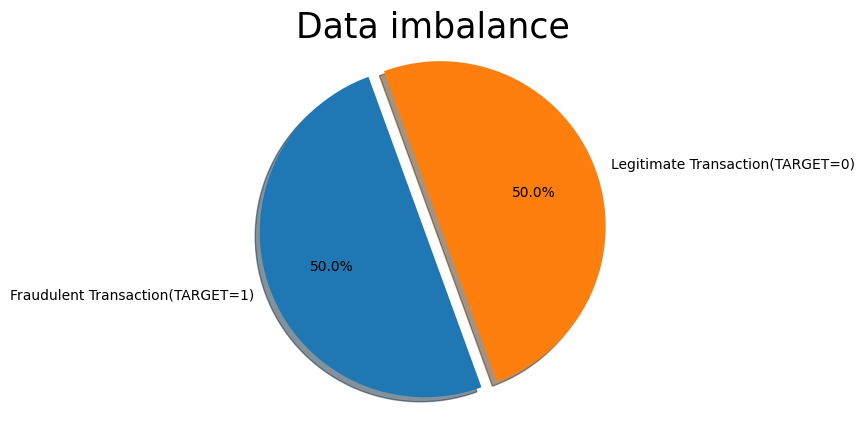

In [29]:
df = df_upsampled
count1 = 0 
count0 = 0
for i in df['TX_FRAUD'].values:
    if i == 1:
        count1 += 1
    else:
        count0 += 1
        
count1 = (count1/len(df['TX_FRAUD']))*100
count0 = (count0/len(df['TX_FRAUD']))*100

x = ['Fraudulent Transaction(TARGET=1)','Legitimate Transaction(TARGET=0)']
y = [count1, count0]


explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Data imbalance',fontsize=25)
plt.show()

as we can see data is now balanced 

- <h2> Feature Extraction </h2>


In [30]:

df = pd.read_csv('E:\\Study\\Project\\FTD\\cleaned_transactions.csv')

df_features = df.drop(['TRANSACTION_ID', 'TX_FRAUD','TX_DATETIME','Unnamed: 0','CUSTOMER_ID','TERMINAL_ID','TX_FRAUD_SCENARIO'], axis=1)

print(df_features.head())

   TX_AMOUNT  TX_TIME_SECONDS  TX_TIME_DAYS
0     619.72         11867589           137
1     613.22          3542397            40
2     244.61           758284             8
3     432.71          6076531            70
4    1324.95         14667661           169


- <h2>Standardizing Data</h2>

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

standardized_features = scaler.fit_transform(df_features)

<a id="modeling"></a>
# 5. Modeling 

- <h2> Selecting Model </h2>

In [32]:
df = pd.read_csv('E:\\Study\\Project\\FTD\\cleaned_transactions.csv')
X = standardized_features
y = df["TX_FRAUD"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [33]:

models = {"Logistic Regression": LogisticRegression(),
          "K-Nearest Neighbors": KNeighborsClassifier(),
          "Decision Tree": DecisionTreeClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Gradient Boosting": GradientBoostingClassifier()}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} accuracy: {acc:.3f}")

Logistic Regression accuracy: 0.953
K-Nearest Neighbors accuracy: 0.989
Decision Tree accuracy: 0.997
Random Forest accuracy: 1.000
Gradient Boosting accuracy: 0.983


We are going to use Decision Tree Classifier and Random Forest. My plan is to use GridSearchCV and see if we can dump up accuracy on Decision Tree Classifier.

- <h2> Model 1) Decision Tree Classifier </h2>

* <h3> Model Optimization</h3>

In [34]:
dt_clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

grid_search = GridSearchCV(dt_clf, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_test, y_test)

print("Best hyperparameters: ", grid_search.best_params_)

KeyboardInterrupt: 

* <h3>Optimised Model </h3>

In [ ]:
model = DecisionTreeClassifier(max_depth= None, min_samples_leaf=1,min_samples_split=2)
model.fit(X_train, y_train)

y_pred_DTC = model.predict(X_test)

acc = accuracy_score(y_test, y_pred_DTC)
cm_DTC = confusion_matrix(y_test, y_pred_DTC)
print("Decision Tree Classifier:")
print("Accuracy:", acc)
print("Confusion Matrix:\n", cm_DTC)

- <h2>Model 2) RandomForestClassifier</h2>

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred_RFC = model.predict(X_test)

acc = accuracy_score(y_test, y_pred_RFC)
cm_RFC = confusion_matrix(y_test, y_pred_RFC)
print("Random Forest Classifier:")
print("Accuracy:", acc)
print("Confusion Matrix:\n", cm_RFC)

<a id = "eval"></a>
# 6. Evaluation 

In [ ]:
cm_sns_DTC = sns.heatmap(cm_DTC,annot=True,fmt='.1f')
cm_sns_DTC.set_title('Confusion Matrix: Decision Tree Classifier')

In [ ]:
cm_sns_RFC = sns.heatmap(cm_RFC,annot=True,fmt='.1f')
cm_sns_RFC.set_title('Confusion Matrix: Random Forest Classifier')

In [ ]:
precision_DTC = precision_score(y_test, y_pred_DTC)
recall_DTC = recall_score(y_test, y_pred_DTC)
f1_DTC = f1_score(y_test, y_pred_DTC)
print("Decision Tree Classifier:")
print("Precision: ", precision_DTC)
print("Recall: ", recall_DTC)
print("F1-Score: ", f1_DTC)

In [ ]:
precision_RFC = precision_score(y_test, y_pred_RFC)
recall_RFC = recall_score(y_test, y_pred_RFC)
f1_RFC = f1_score(y_test, y_pred_RFC)
print("Random Forest Classifier")
print("Precision: ", precision_RFC)
print("Recall: ", recall_RFC)
print("F1-Score: ", f1_RFC)

In [ ]:
classifiers = ['Decision Tree Classifier', 'Random Forest Classifier']
metrics = ['Precision', 'Recall', 'F1-Score']

df = pd.DataFrame({'Classifier': [classifiers[0]]*3 + [classifiers[1]]*3,
                   'Metrics': metrics*2,
                   'Score': [precision_DTC, recall_DTC, f1_DTC, precision_RFC, recall_RFC, f1_RFC]})

fig = px.bar(df, x='Classifier', y='Score', color='Metrics', barmode='group',
             height=400, width=600, title="Classifier Performance Metrics")

fig.update_layout(xaxis=dict(categoryorder='category ascending'))
fig.update_traces(customdata=df['Score'],texttemplate='%{customdata}', textposition='auto', textfont=dict(size=8))
fig.update_traces(text=df['Score'], texttemplate='%{text}', textposition='outside', textfont=dict(size=8))
fig.update_traces(hovertemplate='%{x}<br>Score: %{y:.4f}<extra></extra>')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_traces(text=df['Score'].round(2).astype(str), texttemplate='%{text:.4f}', textposition='outside', textfont=dict(size=8))
fig.show()

In [ ]:
average_precision = average_precision_score(y_test, y_pred_DTC)

print("Average precision-recall score: {:.2f}".format(average_precision))

In [ ]:
average_precision_RFC = average_precision_score(y_test, y_pred_RFC)

print("Average precision-recall score: {:.2f}".format(average_precision))